<a href="https://colab.research.google.com/github/hyhyhy04/colabpython/blob/main/PythonDataAnalysis4_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving marriage_divorce.csv to marriage_divorce.csv
Saving working_hours.csv to working_hours.csv


In [ ]:
import pandas as pd

# 1. CSV 파일 불러오기
df_marry = pd.read_csv('marriage_divorce.csv', encoding='cp949')  # 혼인율 데이터
df_hours = pd.read_csv('working_hours.csv', encoding='cp949')     # 근로시간 데이터

# 2. 혼인율 데이터 전처리
df_marry_clean = df_marry[['행정구역별', '2023.8']].copy()
df_marry_clean.columns = ['지역', '조혼인율']
df_marry_clean = df_marry_clean.iloc[1:].reset_index(drop=True)  # 첫 행 제거 (컬럼명 행)

# 3. 근로시간 데이터 전처리
df_hours_clean = df_hours[['특성별(2)', '2023.3']].copy()
df_hours_clean.columns = ['지역', '평균근로시간']
df_hours_clean = df_hours_clean.iloc[5:].reset_index(drop=True)  # 지역별 데이터만 추출

# 4. 지역 이름 통일을 위한 매핑
region_map = {
    '서울': '서울특별시', '부산': '부산광역시', '대구': '대구광역시',
    '인천': '인천광역시', '광주': '광주광역시', '대전': '대전광역시',
    '울산': '울산광역시', '세종': '세종특별자치시', '경기': '경기도',
    '강원': '강원특별자치도', '충북': '충청북도', '충남': '충청남도',
    '전북': '전북특별자치도', '전남': '전라남도', '경북': '경상북도',
    '경남': '경상남도', '제주': '제주특별자치도'
}
df_hours_clean['지역'] = df_hours_clean['지역'].replace(region_map)

# 5. 두 데이터 병합 (지역 기준)
df_merged = pd.merge(df_marry_clean, df_hours_clean, on='지역')

# 6. 최종 확인
print("🔍 병합된 데이터 미리보기:")
print(df_merged)


🔍 병합된 데이터 미리보기:
         지역 조혼인율 평균근로시간
0     서울특별시  3.9  39.53
1     부산광역시  3.1  38.18
2     대구광역시  3.4  38.03
3     인천광역시  3.9  38.24
4     광주광역시  3.6  35.75
5     대전광역시  3.6  34.43
6     울산광역시  3.9  38.83
7   세종특별자치시  4.4  35.26
8       경기도  4.0  40.30
9   강원특별자치도  3.6  31.47
10     충청북도  3.9  35.87
11     충청남도  3.9  35.50
12  전북특별자치도  3.1  30.54
13     전라남도  3.4  30.87
14     경상북도  3.2  36.10
15     경상남도  3.1  35.45
16  제주특별자치도  3.9  34.93


In [ ]:
# 숫자형으로 변환
df_merged['평균근로시간'] = pd.to_numeric(df_merged['평균근로시간'], errors='coerce')
df_merged['조혼인율'] = pd.to_numeric(df_merged['조혼인율'], errors='coerce')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

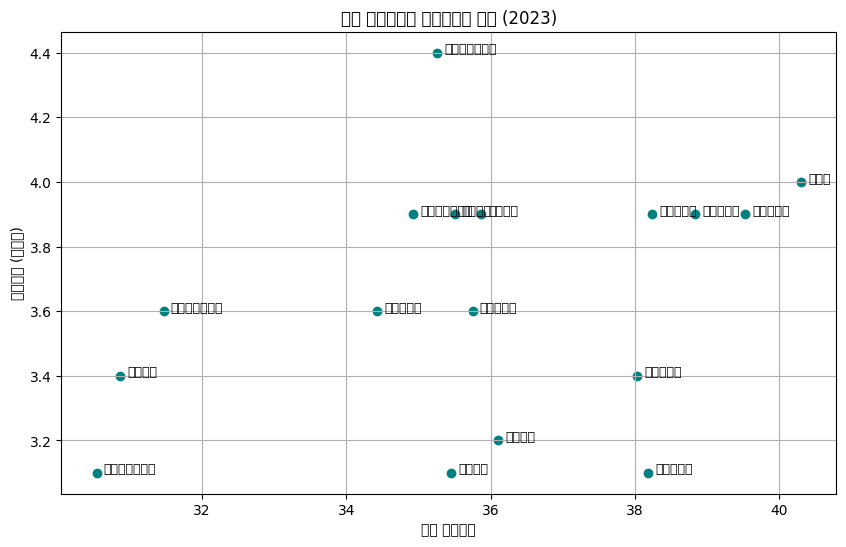

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['평균근로시간'], df_merged['조혼인율'], color='teal')

# 지역 이름 같이 표시해주기
for i in range(len(df_merged)):
    plt.text(df_merged['평균근로시간'][i] + 0.1, df_merged['조혼인율'][i],
             df_merged['지역'][i], fontsize=9)

plt.xlabel("평균 근로시간")
plt.ylabel("조혼인율 (천명당)")
plt.title("평균 근로시간과 조혼인율의 관계 (2023)")
plt.grid(True)
plt.show()


In [ ]:
# 숫자형으로 변환 (혹시 몰라서!)
df_merged['조혼인율'] = pd.to_numeric(df_merged['조혼인율'], errors='coerce')
df_merged['평균근로시간'] = pd.to_numeric(df_merged['평균근로시간'], errors='coerce')

# 상관계수 계산
correlation = df_merged['평균근로시간'].corr(df_merged['조혼인율'])

print(f"💡 평균 근로시간과 조혼인율 간의 상관계수: {correlation:.3f}")


💡 평균 근로시간과 조혼인율 간의 상관계수: 0.331


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

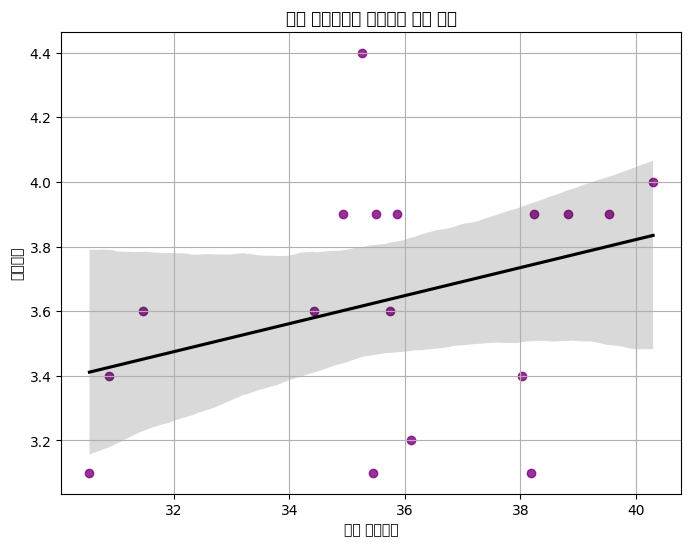

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=df_merged, x='평균근로시간', y='조혼인율', scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})
plt.title('평균 근로시간과 조혼인율 간의 관계')
plt.xlabel('평균 근로시간')
plt.ylabel('조혼인율')
plt.grid(True)
plt.show()
